# 範例 : (Kaggle)房價預測

# [教學目標]
- 以下用房價預測資料, 練習特徵重要性的寫作與觀察
- 由於只有樹狀模型有特徵重要性, 故以梯度提升樹為模型作為範例

# [範例重點]
- 使用擬合過的模型, 計算特徵重要性 (In[3], Out[3]) 
- 對照原始特徵, 觀察特徵重要性較高的一半特徵, 搭配梯度提升樹對於測結果的影響 (In[4], Out[4], In[5], Out[5])
- 重組重要性最高的特徵作為新特徵, 觀察效果如何 (In[8], Out[8]) 

In [1]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

data_path = 'Part02/'
df = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df['SalePrice'])
df = df.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [2]:
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.210191,0.033420,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.257962,0.038795,1.0,0.0,1.0,1.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.75,0.219745,0.046507,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.75,0.194268,0.038561,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.75,0.270701,0.060576,1.0,0.0,0.0,1.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.8


In [3]:
# 梯度提升樹擬合後, 將結果依照重要性由高到低排序
estimator = GradientBoostingRegressor()
estimator.fit(df.values, train_Y)
# estimator.feature_importances_ 就是模型的特徵重要性, 這邊先與欄位名稱結合起來, 才能看到重要性與欄位名稱的對照表
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

OverallQual      4.599705e-01
GrLivArea        1.724030e-01
TotalBsmtSF      5.286224e-02
YearBuilt        4.500497e-02
GarageCars       4.469591e-02
BsmtFinSF1       2.863750e-02
YearRemodAdd     2.197402e-02
LotArea          2.024754e-02
OverallCond      1.706217e-02
1stFlrSF         1.568428e-02
CentralAir       1.416752e-02
GarageArea       1.329383e-02
MSZoning         1.083068e-02
Fireplaces       9.738915e-03
KitchenQual      7.983323e-03
GarageYrBlt      6.620778e-03
ExterQual        6.373297e-03
FireplaceQu      6.185056e-03
2ndFlrSF         5.520484e-03
FullBath         5.342485e-03
SaleCondition    3.247694e-03
GarageType       2.511993e-03
Neighborhood     2.393325e-03
Functional       2.072724e-03
BsmtQual         2.027767e-03
BsmtFullBath     1.946887e-03
OpenPorchSF      1.767076e-03
BsmtExposure     1.427777e-03
ScreenPorch      1.402365e-03
WoodDeckSF       1.332443e-03
                     ...     
LandContour      3.325109e-04
Exterior2nd      3.269545e-04
LotShape  

In [4]:
# 原始特徵 + 梯度提升樹
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8959074713328912

In [5]:
# 高重要性特徵 + 梯度提升樹 (39大約是79的一半)
high_feature = list(feats[:39].index)
train_X = MMEncoder.fit_transform(df[high_feature])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8998211459077297

因為特徵重要性基於梯度提升樹的結果，而梯度提升樹本身在 fit 時會有一些隨機性，在同一台機器上跑同一段程式碼, 每次結果都不見得一樣   
（要排除也不是沒有方法, 就是在 fit 時加上 random_state，包含模型與 train_test_split 等地方都要加, 不過這也沒什麼必要就是了） 

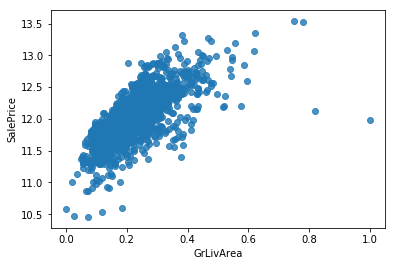

In [7]:
# 觀察重要特徵與目標的分布
# 第一名 : GrLivArea        
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=df['GrLivArea'], y=train_Y, fit_reg=False)
plt.show()

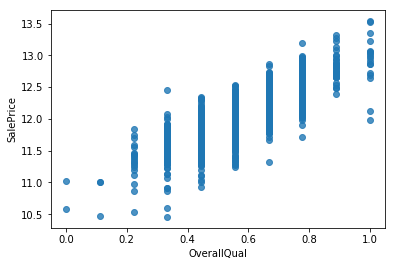

In [8]:
# 第二名 : OverallQual
sns.regplot(x=df['OverallQual'], y=train_Y, fit_reg=False)
plt.show()

In [9]:
# 製作四特徵 : 加, 乘, 互除(分母加1避免除0) 看效果 (Note: 數值原本已經最大最小化介於 [0,1] 區間, 這四種新特徵也會落在 [0,1] 區間)
df['Add_char'] = (df['GrLivArea'] + df['OverallQual']) / 2
df['Multi_char'] = df['GrLivArea'] * df['OverallQual']
df['GO_div1p'] = df['GrLivArea'] / (df['OverallQual']+1) * 2
df['OG_div1p'] = df['OverallQual'] / (df['GrLivArea']+1) * 2
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8948233120975708

# 作業 : (Kaggle)鐵達尼生存預測

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 練習特徵重要性的寫作與觀察

# [作業重點]
- 仿造範例, 完成特徵重要性的計算, 並觀察對預測結果的影響 (In[3]~[5], Out[3]~[5]) 
- 仿造範例, 將兩個特徵重要性最高的特徵重組出新特徵, 並觀察對預測結果的影響 (In[8], Out[8]) 

In [10]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

data_path = 'Part02/'
df = pd.read_csv(data_path + 'titanic_train.csv')

train_Y = df['Survived']
df = df.drop(['PassengerId', 'Survived'] , axis=1)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.0,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.0,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.0,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.0,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.0,0.694118,0.015713,0.000000,1.000000


In [12]:
# 梯度提升樹擬合後, 將結果依照重要性由高到低排序 (note : D27作業中'Ticket'是第一名特徵, 'Age'是數值特徵中排名最高者)
estimator = GradientBoostingClassifier()
estimator.fit(df.values, train_Y)
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

Sex         0.444304
Pclass      0.111905
Ticket      0.098345
Fare        0.087958
Name        0.080720
Age         0.073743
Cabin       0.071462
Embarked    0.012288
Parch       0.011560
SibSp       0.007715
dtype: float64

## 先用梯度提升機對鐵達尼生存預測做訓練，再用其特徵重要性回答下列問題

# 作業1
* 將特徵重要性較低的一半特徵刪除後，再做生存率預估，正確率是否有變化?

In [13]:
# 原始特徵 + 梯度提升樹
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8215972695810002

In [14]:
# 高重要性特徵 + 梯度提升樹 
high_feature = list(feats[:5].index)
train_X = MMEncoder.fit_transform(df[high_feature])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.811465936966161

# 作業2
* 將特徵重要性最高的兩個特徵做特徵組合，是否能再進一步提升預測力?

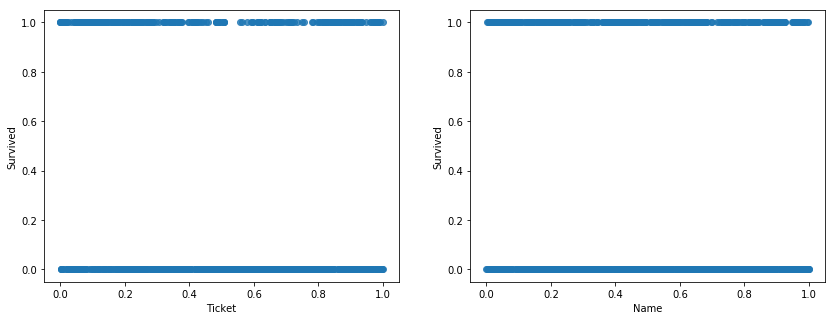

In [15]:
# 觀察重要特徵與目標的分布
# 第一名 : Ticket              
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.regplot(x=df['Ticket'], y=train_Y, fit_reg=False)
# plt.show()
# 第二名 : Name        
plt.subplot(122)
sns.regplot(x=df['Name'], y=train_Y, fit_reg=False)
plt.show()

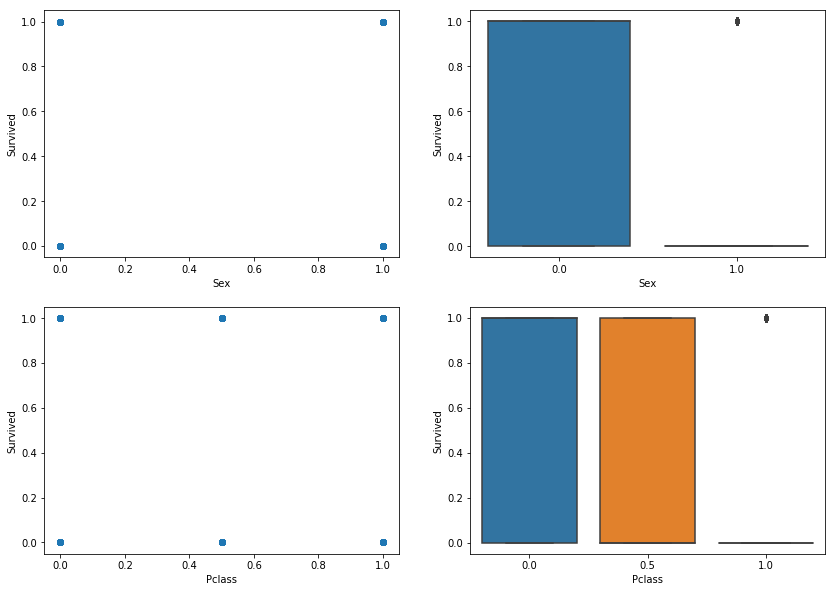

In [16]:
# 實際結果
plt.figure(figsize=(14,10))
plt.subplot(221)
sns.regplot(x=df['Sex'], y=train_Y, fit_reg=False)
plt.subplot(222)
sns.boxplot(x=df['Sex'], y=train_Y)
#plt.show()
# 第二名 : Name        
plt.subplot(223)
sns.regplot(x=df['Pclass'], y=train_Y, fit_reg=False)
plt.subplot(224)
sns.boxplot(x=df['Pclass'], y=train_Y)
plt.show()

In [17]:
# 製作新特徵看效果
df['Add_char'] = (df['Sex'] + df['Pclass']) / 2
df['Multi_char'] = df['Sex'] * df['Pclass']
df['SP_div1p'] = df['Sex'] / (df['Pclass']+1) * 2
df['PS_div1p'] = df['Pclass'] / (df['Sex']+1) * 2
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8327451328770579